## Joe Garcia
## Week Six - Assignment Data Sets
## 100525 -101625
## Professor Alain Ledon



We begin by importing the libraries that we may need, including NetworkX, Pandas, and Matplotlib. Later on, we decided to import the bipartite module from NetworkX to better understand how the dataset is structured and what the graph will display. From what I understand, the dataset focuses on the relationships between women and the events they attended, which are represented as two separate sets of nodes. After reading through the documentation, I learned that nodes represent entities (like people or events) and edges represent the connections between them. This helped me see how the graph visually captures those relationships in a clear and structured way.

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

## Getting the Edges and Nodes

In [2]:
G = nx.davis_southern_women_graph()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Graph type: {type(G)}")

Number of nodes: 32
Number of edges: 89
Graph type: <class 'networkx.classes.graph.Graph'>


## Displaying that we have the data correct

In [3]:
for node, attrs in G.nodes(data=True):
    print(node, attrs)

Evelyn Jefferson {'bipartite': 0}
Laura Mandeville {'bipartite': 0}
Theresa Anderson {'bipartite': 0}
Brenda Rogers {'bipartite': 0}
Charlotte McDowd {'bipartite': 0}
Frances Anderson {'bipartite': 0}
Eleanor Nye {'bipartite': 0}
Pearl Oglethorpe {'bipartite': 0}
Ruth DeSand {'bipartite': 0}
Verne Sanderson {'bipartite': 0}
Myra Liddel {'bipartite': 0}
Katherina Rogers {'bipartite': 0}
Sylvia Avondale {'bipartite': 0}
Nora Fayette {'bipartite': 0}
Helen Lloyd {'bipartite': 0}
Dorothy Murchison {'bipartite': 0}
Olivia Carleton {'bipartite': 0}
Flora Price {'bipartite': 0}
E1 {'bipartite': 1}
E2 {'bipartite': 1}
E3 {'bipartite': 1}
E4 {'bipartite': 1}
E5 {'bipartite': 1}
E6 {'bipartite': 1}
E7 {'bipartite': 1}
E8 {'bipartite': 1}
E9 {'bipartite': 1}
E10 {'bipartite': 1}
E11 {'bipartite': 1}
E12 {'bipartite': 1}
E13 {'bipartite': 1}
E14 {'bipartite': 1}


## Getting the total number of Women and Events. As well as the total Edges. 

In [4]:
women = set()
for n, d in G.nodes(data=True): #d is the attribute and n is the node
    if d["bipartite"] == 0:
        women.add(n)

events = set()
for n, d in G.nodes(data=True):
    if d["bipartite"] == 1:
        events.add(n)

print(f"Women: {len(women)} | Events: {len(events)} | Total edges: {G.number_of_edges()}")

Women: 18 | Events: 14 | Total edges: 89


## Graphing the Nodes into a Visual Display
Here, we decided to graph the network to create a clear visual representation of the relationships within the dataset. We used two different colors, blue for the women and orange for the events,to make it easier to distinguish between the two groups. We also adjusted the node sizes to make the graph appear cleaner and less cluttered, and slightly increased the size of the labels so that each name and event could be read more easily. Overall, this visualization helped bring the data to life, allowing us to see how the women and events are interconnected within the network structure.

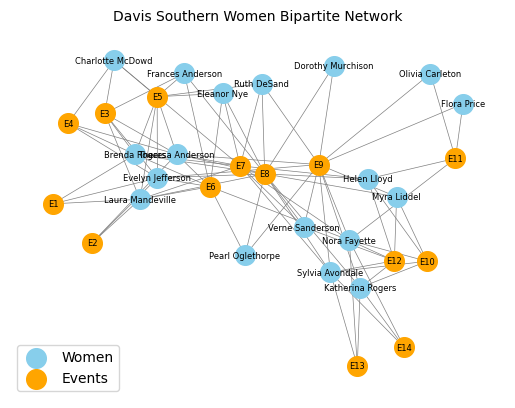

In [5]:
pos = nx.spring_layout(G, seed=42)

# Here I drew the nodes, the women and the events
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color="skyblue", node_size=200, label="Women")
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color="orange", node_size=200, label="Events")

#Here I drew from Networkx out the edgels and labels
nx.draw_networkx_edges(G, pos, edge_color="gray", width=0.5)
nx.draw_networkx_labels(G, pos, font_size=6)

plt.title("Davis Southern Women Bipartite Network", fontsize=10)
plt.axis("off")
plt.legend(scatterpoints=1)
plt.show()

We imported bipartite and use weighted_projected_graph. Bipartite contains functions specifically designed for bipartite (two-mode) networks, where nodes can be divided into two distinct sets and edges only go between the sets, never within the same set. Weighted_projected_graph adds a weight equal to how many shared neighbors they have.

In [11]:
W = bipartite.weighted_projected_graph(G, women)


Here I took the weighted edges and got the connections between 2 women.  

In [22]:
connections = [
    (woman1, woman2, data['weight'])
    for woman1, woman2, data in W.edges(data=True)
]

connections[:5]

[('Evelyn Jefferson', 'Helen Lloyd', 1),
 ('Evelyn Jefferson', 'Brenda Rogers', 6),
 ('Evelyn Jefferson', 'Sylvia Avondale', 2),
 ('Evelyn Jefferson', 'Ruth DeSand', 3),
 ('Evelyn Jefferson', 'Pearl Oglethorpe', 3)]

I sorted the weighted edges to the 10 most shared connections (shared with events) between the women.

In [16]:


connections_sorted = sorted(connections, key=lambda x: x[2], reverse=True)

print("Top 10 strongest connections (shared events):\n")
for woman1, woman2, shared_events in connections_sorted[:10]:
    print(f"{woman1} and {woman2} attended {shared_events} events together")

Top 10 strongest connections (shared events):

Evelyn Jefferson and Theresa Anderson attended 7 events together
Evelyn Jefferson and Brenda Rogers attended 6 events together
Evelyn Jefferson and Laura Mandeville attended 6 events together
Theresa Anderson and Brenda Rogers attended 6 events together
Theresa Anderson and Laura Mandeville attended 6 events together
Laura Mandeville and Brenda Rogers attended 6 events together
Sylvia Avondale and Katherina Rogers attended 6 events together
Sylvia Avondale and Nora Fayette attended 6 events together
Katherina Rogers and Nora Fayette attended 5 events together
Evelyn Jefferson and Frances Anderson attended 4 events together


## Focusing on Evelyn Jeffereson and Theresa Anderson

Here, I focused on Evelyn Jefferson and Theresa Anderson. It’s actually quite interesting to see how clearly the graph shows the specific events they both attended. By visually mapping the network, it becomes easy to identify their shared connections at a glance, you can immediately tell that these two women are closely linked through multiple events. It’s fascinating how data visualization makes these relationships so intuitive to understand. In this case, we can see that Evelyn and Theresa both participated in events 2, 3, 4, 5, 6, 8, and 9, which highlights how active and socially connected they were within this small community network.

{'E8': Text(-0.00707771159635494, 0.027015496644395783, 'E8'),
 'E3': Text(-0.7573758272008733, 0.2889725054693674, 'E3'),
 'E4': Text(-0.929589404875478, 0.24607380955062366, 'E4'),
 'E9': Text(0.24674004173102657, 0.06739890862239077, 'E9'),
 'E6': Text(-0.2640104038567463, -0.028481915735530446, 'E6'),
 'E2': Text(-0.8177553895217643, -0.27277572013570023, 'E2'),
 'E5': Text(-0.5116737137262279, 0.3615756790351337, 'E5')}

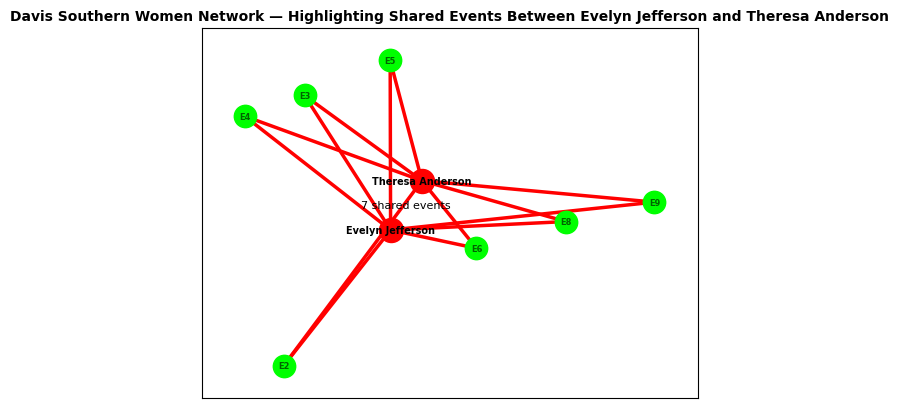

In [29]:
w1, w2 = "Evelyn Jefferson", "Theresa Anderson"

shared_events = set(G.neighbors(w1)) & set(G.neighbors(w2))

nx.draw_networkx_nodes(G, pos, nodelist=[w1, w2], node_color="red", node_size=300, label="Highlighted women")

nx.draw_networkx_nodes(G, pos, nodelist=sorted(shared_events), node_color="lime", node_size=260, label="Shared events")

shared_edgelist = [(w1, e) for e in shared_events] + [(w2, e) for e in shared_events]
nx.draw_networkx_edges(G, pos, edgelist=shared_edgelist, edge_color="red", width=2.5)

x = (pos[w1][0] + pos[w2][0]) / 2
y = (pos[w1][1] + pos[w2][1]) / 2
plt.text(x, y, f"{len(shared_events)} shared events", fontsize=8, ha="center", va="center")

plt.title("Davis Southern Women Network — Highlighting Shared Events Between Evelyn Jefferson and Theresa Anderson", fontsize=10, fontweight="bold")

nx.draw_networkx_labels(
    G, pos,
    labels={w1: w1, w2: w2},
    font_size=7, font_color="black", font_weight="bold"
)

# Label the shared events (in a different color)
event_labels = {event: event for event in shared_events}
nx.draw_networkx_labels(
    G, pos,
    labels=event_labels,
    font_size=6, font_color="darkgreen", font_weight="bold"
)




In conclusion, this was a very interesting and insightful dataset to explore using NetworkX. It provided a clear and hands on way to understand the basic foundational concepts behind network analysis, such as nodes, edges, and relationships between entities. The dataset is simple yet effective, showing how connections between the women and their shared social events can form a small but meaningful network. Overall, it served as a great introduction to how complex social structures can be represented and analyzed through graphs. 